# Get faces and crop to size

the VGGFace2 needs 224x224 as input size

**The images are already downloaded but not yet resiced etc. Done in 'Image-Crawler'**


In [ ]:
from pathlib import Path
import glob
import matplotlib.pyplot as plt
import cv2
import os
import time
%matplotlib inline
face_cascade = cv2.CascadeClassifier('/home/base/Documents/Git/Projekte/Face-celeb-rec/Celebrity-Face-Matcher/haarcascade_frontalface_alt.xml')

path = Path.cwd() / 'Celebs/'#'root_dir'
savefolder=Path( Path.cwd() / 'All_croped_images/')
os.makedirs(savefolder, exist_ok=True)

Gray=False # Read images as Grayscale or RGB
p=50 #Buffer for space around detected face to croping
width=224
height=width

Folderlist=next(os.walk(path))[1]
print (Folderlist)

for celeb in Folderlist:
    filelist=next(os.walk(Path(path / celeb)))[2]
    print(celeb)
    for f in filelist: #Listing jpg files in this directory tree     
        if Gray==True:
            img=cv2.imread(str(Path(path / celeb / f)), cv2.IMREAD_GRAYSCALE)
        else:
            img=cv2.imread(str(Path(path / celeb / f)), cv2.IMREAD_COLOR)
        
        print(f)
#Detect face
        faces_detected = face_cascade.detectMultiScale(img, scaleFactor=1.1, minNeighbors=4)
        if len(faces_detected)!=0: # only if the cascader detected a face, otherwise error
            (x, y, w, h) = faces_detected[0]
#create folderstructure with a new folder for each celebrity 
            croppedpath=Path(savefolder/celeb)
            os.makedirs(croppedpath, exist_ok=True)
            filename = f'{croppedpath}/{f}'
#Crop image to face 
            img=img[y-p+1:y+h+p, x-p+1:x+w+p] #use only the detected face; crop it
            if img.shape > (width,height) and img.size is not 0:
                img=cv2.resize(img, (width, height), interpolation=cv2.INTER_LINEAR) #resize the image to desired dimensions e.g., 256x256  
#Save croped image in folder
                cv2.imwrite(filename, img) #save image in folder
#                 cv2.imshow(str(f), img)
            else:
                print('image to small or facebox out of image')
        else:
            print('no face detected')     
            
cv2.destroyAllWindows()


# Create predefined face-embeddings for later comparison

thx: \
https://machinelearningmastery.com/how-to-perform-face-recognition-with-vggface2-convolutional-neural-network-in-keras/

In [1]:
from pathlib import Path
import os
import cv2
import numpy as np
import pandas as pd
from numpy import asarray
from numpy import expand_dims
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input

resnet50_features = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3),
                                pooling='avg')  # pooling: None, avg or max



PFAD=Path( Path.cwd() / 'All_croped_images/')
CelebFolders=next(os.walk(PFAD))[1]
EMBEDDINGS=pd.DataFrame()
Ebeddingstmp=pd.DataFrame()
n=0

for celeb in CelebFolders[0:]:
    print(celeb)
    filelist=next(os.walk(Path(PFAD / celeb)))[2]
    for f in filelist:
        n+=1
        img=cv2.imread(str(Path(PFAD / celeb / f)), cv2.IMREAD_COLOR)

# Make images the same as they were trained on in the VGGface2 Model
# convert one face into samples 
        pixels = img.astype('float32')
        samples = expand_dims(pixels, axis=0)
# prepare the face for the model, e.g. center pixels
        samples = preprocess_input(samples, version=2)


        features = resnet50_features.predict(samples)
        if EMBEDDINGS is None:
            EMBEDDINGS= {'Name':celeb, 'File': f, 'Embedding': features}
        else:
             EMBEDDINGS=EMBEDDINGS.append({'Name':celeb, 'File': f, 'Embedding': features}, ignore_index=True, sort =False)
    print(n) 
        
EMBEDDINGS.to_csv(Path(Path.cwd() / 'EMBEDDINGS.csv'),index=False)  
EMBEDDINGS.to_json(Path(Path.cwd() / 'EMBEDDINGS.json'))  

#Embedding2=np.array(EMBEDDINGS).sum(axis=1) / len(EMBEDDINGS)                

Using TensorFlow backend.
/home/base/anaconda3/envs/celeb/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/base/anaconda3/envs/celeb/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/base/anaconda3/envs/celeb/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/base/anaconda3/envs/cel

Salma Hayek
9
Woody Allen
11
Michelle Yeoh
21
Kim Basinger
31
Jamie Bell
40
Idris Elba
48
Forest Whitaker
53
Art Carney
57
Amanda Bynes
66
Taron Egerton
76
Barbara Stanwyck
85
Geoffrey Rush
93
Rashida Jones
102
Brendan Fraser
111
Teresa Wright
121
Anjelica Huston
128
Gael García Bernal
138
Alec Baldwin
148
Janet Leigh
156
Vanessa Hudgens
166
Megan Fox
174
Erich von Stroheim
180
Celeste Holm
188
Kerry Washington
196
Glenda Jackson
204
Edward G. Robinson
214
Queen Latifah
223
Walter Brennan
232
Jeremy Renner
239
Jon Heder
249
Jack Lemmon
256
Burt Reynolds
266
Juliette Binoche
276
Lucy Liu
285
Paul Bettany
293
Gig Young
303
Margot Robbie
313
Mickey Rourke
320
Brit Marling
330
Jessica Chastain
339
Walter Matthau
343
Barry Fitzgerald
351
Greer Garson
360
Patricia Arquette
369
Elizabeth Taylor
376
Eva Green
381
Henry Cavill
391
Logan Lerman
401
Chris Hemsworth
410
Michael Ealy
416
Keisha Castle-Hughes
425
Neve Campbell
433
Julia Louis-Dreyfus
440
Claudia Cardinale
448
Marisa Tomei
456
Julia 

3728
Famke Janssen
3737
George Kennedy
3746
Sarah Jessica Parker
3755
Ed Begley
3763
Kirk Douglas
3771
Haley Joel Osment
3781
Richard Gere
3791
Brenda Blethyn
3801
Tom Cruise
3809
Claudette Colbert
3816
Owen Wilson
3825
Fred Astaire
3832
Beatrice Straight
3840
Patrick Wilson
3850
Kathleen Turner
3858
Daryl Hannah
3867
Danny Aiello
3876
Rebel Wilson
3886
Lisa Kudrow
3896
Peter Dinklage
3905
Viola Davis
3915
Tom Wilkinson
3923
Adam Driver
3933
Octavia Spencer
3943
Melvyn Douglas
3952
Cate Blanchett
3962
Norma Shearer
3970
Alicia Vikander
3980
Liam Neeson
3989
River Phoenix
3996
Marlon Wayans
4006
Timothy Olyphant
4014
Naomi Watts
4024
Dwayne Johnson
4030
Angela Lansbury
4039
Jason Bateman
4049
Michelle Monaghan
4057
Michael Cera
4067
Bill Hader
4077
Billy Burke
4087
John Hurt
4094
Robert Pattinson
4104
Nick Nolte
4108
Ben Foster
4117
Kate Winslet
4127
Guy Pearce
4133
Kate Bosworth
4142
Susan Sarandon
4151
James Caan
4161
Milla Jovovich
4168
Chloë Grace Moretz
4178
Andrew Lincoln
4187
Vin

7409
Patrick Swayze
7416
Heath Ledger
7423
James Marsden
7433
Robin Weigert
7442
Uma Thurman
7450
Teresa Palmer
7458
Hugh Laurie
7468
Bernie Mac
7473
Paul Newman
7482
Andrea Riseborough
7491
Marcello Mastroianni
7499
Bonnie Hunt
7509
F. Murray Abraham
7515
James Garner
7525
Red Buttons
7527
Carol Burnett
7536
Orlando Bloom
7545
Kevin Bacon
7555
Stellan Skarsgård
7563
Maximilian Schell
7572
Tim Roth
7582
Henry Fonda
7592
Lucille Ball
7599
Brad Pitt
7609
Emmanuelle Riva
7617
Kevin Spacey
7626
Janet Gaynor
7634
Albert Brooks
7642
Jon Favreau
7650
Christina Ricci
7658
Charles Bronson
7666
Rosalind Russell
7673
Jon Voight
7683
Rachel Griffiths
7693
Shirley Temple
7702
Tim Curry
7710
Aaron Paul
7720
Jason Schwartzman
7730
Piper Perabo
7740
Ernest Borgnine
7748
Rene Russo
7757
Gary Busey
7766
Dustin Hoffman
7775
Mel Blanc
7782
Tom Hardy
7788
Mélanie Laurent
7798
Jay Baruchel
7807
Cam Gigandet
7816
James Coburn
7823
Jeff Goldblum
7830
Audrey Tautou
7840
Gale Sondergaard
7848
Demi Moore
7858
Je

 Distance value:  0  |  Name:  Salma Hayek  |   Filename:  000006.jpg


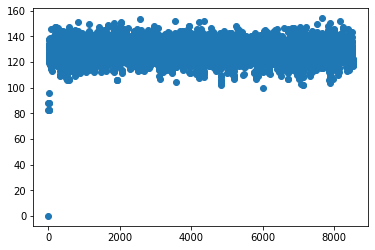

In [21]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

#EMBEDDINGS2=pd.read_csv(Path(Path.cwd() / 'EMBEDDINGS.csv'),delimiter=",", decimal=".",dtype=object)
EMBEDDINGS=pd.read_json(Path(Path.cwd() / 'EMBEDDINGS_8k.json'))


fakepic=np.array(EMBEDDINGS.Embedding[0])

# print(len(EMBEDDINGS.File))
EuDist=[]
for i in range(len(EMBEDDINGS.File)):
    pics=np.array(EMBEDDINGS.Embedding[i])
    dist = np.linalg.norm(fakepic-pics)
    EuDist.append(np.linalg.norm(fakepic-pics))
#print(EuDist)
#print(np.argmin(EuDist))
print(' Distance value: ', np.argmin(EuDist), ' | ' , 'Name: ', EMBEDDINGS.Name[np.argmin(EuDist)],' | ' ,' Filename: ', EMBEDDINGS.File[np.argmin(EuDist)])
plt.scatter(range(len(EMBEDDINGS.File)),EuDist)